# Chicago Crime Data Analysis

## Data ingestion: Dataset Setup and Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [30]:
# loading the zip data
# path="../data/archive_3.zip"
# df= pd.read_csv(path,low_memory=True, compression='zip')

# loading the csv file
path="../data/Crimes_2001_to_Present.csv"

# Define data types to reduce memory usage
dtype_dict = {
'ID': 'Int32',
'Case Number': 'string',
'IUCR': 'category',
'Primary Type': 'category',
'Description': 'category',
'Location Description': 'category',
'Arrest': 'bool',
'Domestic': 'bool',
'Beat': 'Int16',
'District': 'Int8',
'Ward': 'Int8',
'Community Area': 'Int8',
'FBI Code': 'category',
'X Coordinate': 'float32',
'Y Coordinate': 'float32',
'Latitude': 'float32',
'Longitude': 'float32'
}
df = pd.read_csv(path, dtype=dtype_dict)

## Preliminary Data Analysis

In [31]:
# let take a snap shot view on our data
print("============ OVERVIEW OF THE DATA =========\n")
print(f"Data info: {df.info()}\n")

print(f"Column list: {df.columns}\n")

print("\n============ Description of the data =========\n")
print(f"{df.describe(include='all')}")


============ OVERVIEW OF THE DATA =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ID                    Int32   
 1   Case Number           string  
 2   Date                  object  
 3   Block                 object  
 4   IUCR                  category
 5   Primary Type          category
 6   Description           category
 7   Location Description  category
 8   Arrest                bool    
 9   Domestic              bool    
 10  Beat                  Int16   
 11  District              Int8    
 12  Ward                  Int8    
 13  Community Area        Int8    
 14  FBI Code              category
 15  X Coordinate          float32 
 16  Y Coordinate          float32 
 17  Year                  int64   
 18  Updated On            object  
 19  Latitude              float32 
 20  Longitude             float32 
 21  Location 

In [32]:
# checking first five rows
print ("\nThe last five rows")
print(df.head())



The last five rows
         ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
2        THEFT                OVER $500            RESIDENCE   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y C

In [33]:
# checking last five rows
print ("\nThe last five rows")
print(df.tail())


The last five rows
               ID Case Number                    Date                Block  \
7784659  12847575    JF420478  09/01/2022 05:00:00 AM      005XX W SURF ST   
7784660  12847801    JF420319  07/08/2022 12:00:00 AM  114XX S PRAIRIE AVE   
7784661  12847324    JF420102  09/27/2022 11:00:00 AM      023XX E 70TH ST   
7784662  12847570    JF420427  09/03/2022 10:25:00 AM   052XX W CARMEN AVE   
7784663  12840464    JF411839  09/26/2022 07:20:00 PM    0000X N MASON AVE   

         IUCR        Primary Type                    Description  \
7784659  2825       OTHER OFFENSE        HARASSMENT BY TELEPHONE   
7784660  1130  DECEPTIVE PRACTICE       FRAUD OR CONFIDENCE GAME   
7784661  0810               THEFT                      OVER $500   
7784662  2021           NARCOTICS         POSSESS - BARBITURATES   
7784663  143A   WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

                    Location Description  Arrest  Domestic  ...  Ward  \
7784659                      

In [34]:
# checking the missing data
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

## Data Cleaning and Preprocessing

### Let extract data from data

In [35]:
 # Ensure Date is datetime
df['Date'] = pd.to_datetime(
    df['Date'],
    format="%m/%d/%Y %I:%M:%S %p",
    errors="coerce"
)


In [36]:
# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Day_of_Week'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['Day_Name'] = df['Date'].dt.day_name()
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6])  # Saturday, Sunday

In [37]:
# let see the new columns
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Day_of_Week', 'Day_Name',
       'Month_Name', 'Quarter', 'Is_Weekend'],
      dtype='object')

### Now let remove missing values

In [38]:
# let remove missing value
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
Month                        0
Day                          0
Hour                         0
Day_of_Week                  0
Day_Name                     0
Month_Name                   0
Quarter                      0
Is_Weekend                   0
dtype: int64

In [39]:
# let make a copy first
new_df= df.copy()

In [40]:
# removing invalid data 
print(f"Data size before cleaning: {len(new_df)}")
new_df.dropna(subset="Location", inplace=True)
print(f"Data size after cleaning: {len(new_df)}")

Data size before cleaning: 7784664
Data size after cleaning: 7697816


In [41]:
# removing duplicate data 
print(f"Data size before cleaning: {len(new_df)}")
new_df.drop_duplicates()
print(f"Data size after cleaning: {len(new_df)}")

Data size before cleaning: 7697816
Data size after cleaning: 7697816


In [42]:
# removing data outrange of Chicago distreet
print(f"Data size before cleaning: {len(new_df)}")
cleaned_df= new_df[((new_df["Latitude"]).between(41.6, 42.1)) &
                ((new_df["Longitude"]).between(-87.9, -87.5))
                ]
cleaned_df.reset_index()
print(f"After removing invalid coordinates: {len(cleaned_df)} removed:({len(new_df) - len(cleaned_df)})")


Data size before cleaning: 7697816
After removing invalid coordinates: 7671877 removed:(25939)


In [43]:
# Handle outliers in district/ward
ncleaned_df = cleaned_df[
    (cleaned_df['District'].between(1, 25)) & 
    (cleaned_df['Ward'].between(1, 50))
]
print(f"After removing District and ward outliers: {len(ncleaned_df)} removed:({len(cleaned_df) - len(ncleaned_df)})")


After removing District and ward outliers: 7068425 removed:(603452)


In [44]:
# let  Standardize text fields 'Primary Type' and 'Location Description' for easy retrieval without missing out data
ncleaned_df['Primary Type']=ncleaned_df['Primary Type'].str.upper()
ncleaned_df['Location Description']=ncleaned_df['Location Description'].str.upper()

In [45]:
ncleaned_df['Location Description'].head()

0    RESIDENCE
1      CTA BUS
3     SIDEWALK
4    APARTMENT
5    RESIDENCE
Name: Location Description, dtype: object

In [46]:
ncleaned_df['Primary Type'].head()

0      BATTERY
1        THEFT
3    NARCOTICS
4      ASSAULT
5     BURGLARY
Name: Primary Type, dtype: object

In [47]:
# verifying the data
# checking the missing data
 # Missing critical fields
critical_missing = ncleaned_df[['Date', 'Primary Type', 'Latitude', 'Longitude']].isnull().sum()
print(f"Missing Critical Fields:\n{critical_missing}")

Missing Critical Fields:
Date            0
Primary Type    0
Latitude        0
Longitude       0
dtype: int64


### Export the cleaned data

In [48]:
ncleaned_df.to_csv("../data/Cleaned_data.csv", index=False)

## Descriptive Data Analysis(DDA)

### Crime Data Analysis – Insights Framework (Some insight to look at)
1.  Frequency Insights (What types of crimes & where they occur most)

    -   Top 10 major crime types (Primary Type).
    -   Top 10 wards with the highest crime counts.
    -   Top 10 districts with the highest crime counts.
    -   Top 10 blocks with the highest crime counts.
    -   Location-based crime analysis (e.g., Residence, Street, Public Place).

2. Temporal Insights (When crimes happen)

    -   Crime frequency by day of the week.
    -   Crime trends by month of the year.
    -   Year-over-year crime trend.
    -   Hourly distribution of crimes.
    -   Weekday vs Weekend crime comparison.

3. Resolution Insights (How crimes are resolved)

    -   Overall resolution rate (Arrested vs Not Arrested).
    -   Arrest likelihood by crime type (which crimes are most likely to result in arrest).
    -   Domestic vs Non-domestic crime comparison (both frequency & resolution).
    -   Ward with the highest crime resolution rate (effectiveness by region).

4. Trend & Severity Insights (How crimes evolve & seriousness)

    -   Long-term trend analysis (crime volume over multiple years).
    -   Crime severity breakdown (if IUCR or felony/misdemeanor distinction is available).

In [2]:
# let copy the cleaned data before analysis
# df_cleaned = ncleaned_df.copy()

# reload the cleaned data is required to load it from the start again
# reload the importation of libaries codes too
import pandas as pd
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

df_cleaned = pd.read_csv('../data/Cleaned_data.csv')
df_cleaned.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Month,Day,Hour,Day_of_Week,Day_Name,Month_Name,Quarter,Is_Weekend
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.67000,"(41.815117282, -87.669999562)",9,5,13,5,Saturday,September,3,True
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.76540,"(41.895080471, -87.765400451)",9,4,11,4,Friday,September,3,False
2,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.71665,"(41.937405765, -87.716649687)",9,5,12,5,Saturday,September,3,True
3,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.75512,"(41.881903443, -87.755121152)",9,5,13,5,Saturday,September,3,True
4,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,-87.65843,"(41.744378879, -87.658430635)",9,5,10,5,Saturday,September,3,True


#### 1.  Frequency Insights (What types of crimes & where they occur most)

##### Top 10 major crime types (Primary Type).

In [3]:
# Top 10 major crime types (Primary Type).
top10crime = df_cleaned["Primary Type"].value_counts().head(10).reset_index()
top10crime.columns=['Primary Type','Crime_Count']
print(f"\nThe Top 10 Crimes are:")
top10crime


The Top 10 Crimes are:


,Primary Type,Crime_Count
0,THEFT,1492340
1,BATTERY,1298396
2,CRIMINAL DAMAGE,811025
3,NARCOTICS,667246
4,ASSAULT,465144
5,OTHER OFFENSE,435611
6,BURGLARY,390494
7,MOTOR VEHICLE THEFT,339144
8,DECEPTIVE PRACTICE,307155
9,ROBBERY,267971


##### Top 10 wards with highest crime rate.

In [4]:
# Top 10 wards with highest crime rate
top10_wards_crime_rate = df_cleaned['Ward'].value_counts().head(10).reset_index()
top10_wards_crime_rate.columns = ['Ward', 'Crime_Count']
print("The Top 10 wards with highest crime rate are:")
top10_wards_crime_rate

The Top 10 wards with highest crime rate are:


,Ward,Crime_Count
0,28,325143
1,42,294718
2,24,277690
3,27,266680
4,2,252150
5,6,235069
6,17,235000
7,20,232951
8,3,216592
9,21,215223


##### Top 10 districts with the highest crime counts.

In [5]:
# Top 10 districts with highest crime rate
top10_districts_crime_rate = df_cleaned['District'].value_counts().head(10).reset_index()
top10_districts_crime_rate.columns = ['District', 'Crime_Count']
print("The Top 10 districts with highest crime rate are:")
top10_districts_crime_rate

The Top 10 districts with highest crime rate are:


,District,Crime_Count
0,8,479306
1,11,457597
2,6,419384
3,7,412834
4,4,406672
5,25,403259
6,3,361056
7,12,349637
8,9,346081
9,2,321880


##### Top 10 blocks with the highest crime counts.

In [6]:
# Top 10 blocks with highest crime rate
top10_blocks_crime_rate = df_cleaned['Block'].value_counts().head(10).reset_index()
top10_blocks_crime_rate.columns = ['Block', 'Crime_Count']
print("The Top 10 blocks with highest crime rate are:")
top10_blocks_crime_rate

The Top 10 blocks with highest crime rate are:


,Block,Crime_Count
0,001XX N STATE ST,14122
1,076XX S CICERO AVE,10070
2,008XX N MICHIGAN AVE,9355
3,0000X N STATE ST,8422
4,064XX S DR MARTIN LUTHER KING JR DR,5931
5,063XX S DR MARTIN LUTHER KING JR DR,5556
6,023XX S STATE ST,4670
7,001XX W 87TH ST,4613
8,012XX S WABASH AVE,4376
9,006XX N MICHIGAN AVE,4334


##### Location-based crime analysis (e.g., Residence, Street, Public Place).

In [7]:
crime_location=df_cleaned['Location Description'].value_counts().head(10).reset_index() #just ten highest 
crime_location.columns=['Location Description','Crime_Count']
print("\n The Location Description with highest description")
crime_location


 The Location Description with highest description


,Location Description,Crime_Count
0,STREET,1825102
1,RESIDENCE,1165669
2,APARTMENT,831832
3,SIDEWALK,687104
4,OTHER,238985
5,PARKING LOT/GARAGE(NON.RESID.),181370
6,ALLEY,158404
7,SMALL RETAIL STORE,136535
8,"SCHOOL, PUBLIC, BUILDING",131550
9,RESIDENCE-GARAGE,122180


#### 2. Temporal Insights (When crimes happen)

##### Crime frequency by day of the week.

In [8]:
df_cleaned.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour', 'Day_of_Week', 'Day_Name',
       'Month_Name', 'Quarter', 'Is_Weekend'],
      dtype='object')

In [9]:
days_crime=df_cleaned['Day_Name'].value_counts().reset_index()
days_crime.columns=["Days of the week", "Crime Count"]
days_crime

,Days of the week,Crime Count
0,Friday,1062388
1,Wednesday,1015864
2,Saturday,1013784
3,Tuesday,1009004
4,Thursday,1004926
5,Monday,997688
6,Sunday,964771


##### Crime trends by month of the year.

In [10]:
month_crime= df_cleaned["Month_Name"].value_counts().sort_index().reset_index()
month_crime.columns=['Month Name', 'Crime Count']
print("\nCrime trends by months")
print(month_crime)


Crime trends by months
   Month Name  Crime Count
0       April       568502
1      August       657453
2    December       531789
3    February       474737
4     January       537360
5        July       664286
6        June       631980
7       March       566099
8         May       634155
9    November       559970
10    October       623458
11  September       618636


In [11]:
# Crime per month grouped by year
month_by_year_crime= df_cleaned.groupby("Year")['Month_Name'].value_counts().sort_index().reset_index()
month_by_year_crime.columns=['Year', 'Month','Crime Count']
print("\nMonthly Crime trends grouped by years")
month_by_year_crime
month_by_year_crime['Month']


Monthly Crime trends grouped by years


0          April
1         August
2       December
3       February
4        January
         ...    
263    September
264        April
265     February
266      January
267        March
Name: Month, Length: 268, dtype: object

##### Year-over-year crime trend.

In [12]:
year_crime= df_cleaned["Year"].value_counts().sort_index().reset_index()
year_crime.columns=['Year', 'Crime Count']
print("Crime trends by month of the year")
year_crime

Crime trends by month of the year


,Year,Crime Count
0,2001,3885
1,2002,343949
2,2003,470679
3,2004,465912
4,2005,448697
5,2006,443717
6,2007,434014
7,2008,418429
8,2009,384681
9,2010,368987


##### Hourly distribution of crimes (crime patterns across the day).

In [25]:
hourly_crime= df_cleaned['Hour'].value_counts().reset_index()
hourly_crime.columns=["Hour", "Crime Count"]
print("\n Hourly distribution of crimes\n")
hourly_crime




 Hourly distribution of crimes



,Hour,Crime Count
0,12,404201
1,19,399018
2,0,397814
3,20,396893
4,18,385901
5,21,385234
6,22,378980
7,15,377304
8,17,363303
9,16,357585


##### Weekday vs Weekend crime comparison.

In [26]:
weekend_crime= df_cleaned["Is_Weekend"].value_counts().reset_index()
weekend_crime.columns=["Is_weekend", "Crime count"]
weekend_crime

,Is_weekend,Crime count
0,False,5089870
1,True,1978555


## Visualization

#### Top 10 major crime types (Primary Type)

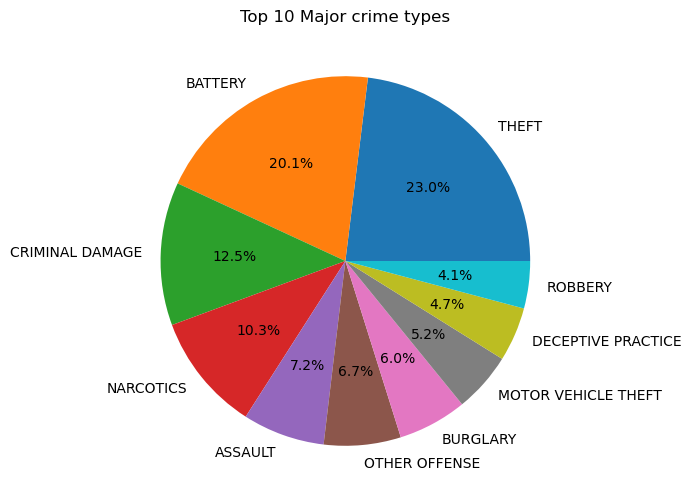

In [13]:
# Pie chart plot
plt.figure(figsize=(8,6))
plt.pie(top10crime["Crime_Count"],labels=top10crime["Primary Type"].astype(str),autopct="%1.1f%%")
plt.title("Top 10 Major crime types")
plt.show()

#### Top 10 Wards with Highest Reported Crimes

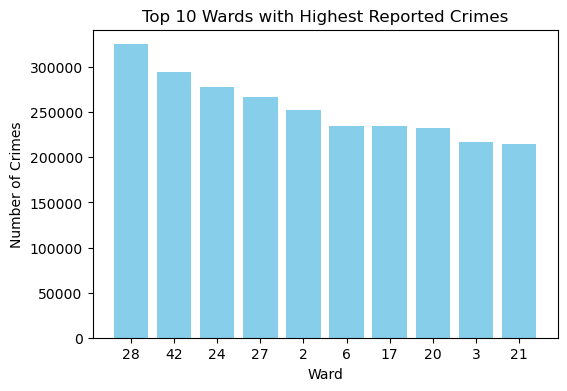

In [14]:
# Plot
plt.figure(figsize=(6,4))
plt.bar(top10_wards_crime_rate['Ward'].astype(str), top10_wards_crime_rate['Crime_Count'], color='skyblue')
plt.title('Top 10 Wards with Highest Reported Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.show()

#### Top 10 districts with Highest Reported Crimes

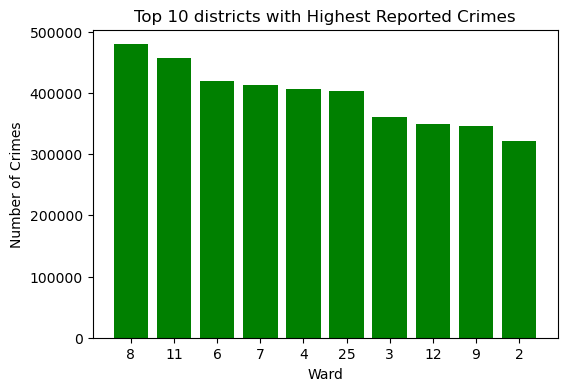

In [15]:
# Plot
plt.figure(figsize=(6,4))
plt.bar(top10_districts_crime_rate['District'].astype(str), top10_districts_crime_rate['Crime_Count'], color='green')
plt.title('Top 10 districts with Highest Reported Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.show()

#### Top 10 Blocks with Highest Reported Crimes

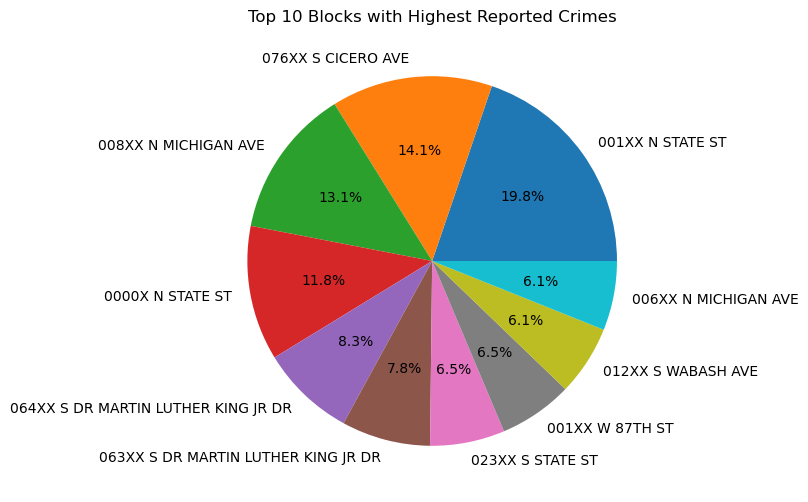

In [16]:
# Pie chart plot
plt.figure(figsize=(8,6))
plt.pie(top10_blocks_crime_rate["Crime_Count"],labels=top10_blocks_crime_rate["Block"].astype(str),autopct="%1.1f%%")
plt.title("Top 10 Blocks with Highest Reported Crimes")
plt.show()

#### Top 10 Location description with Highest Reported Crimes

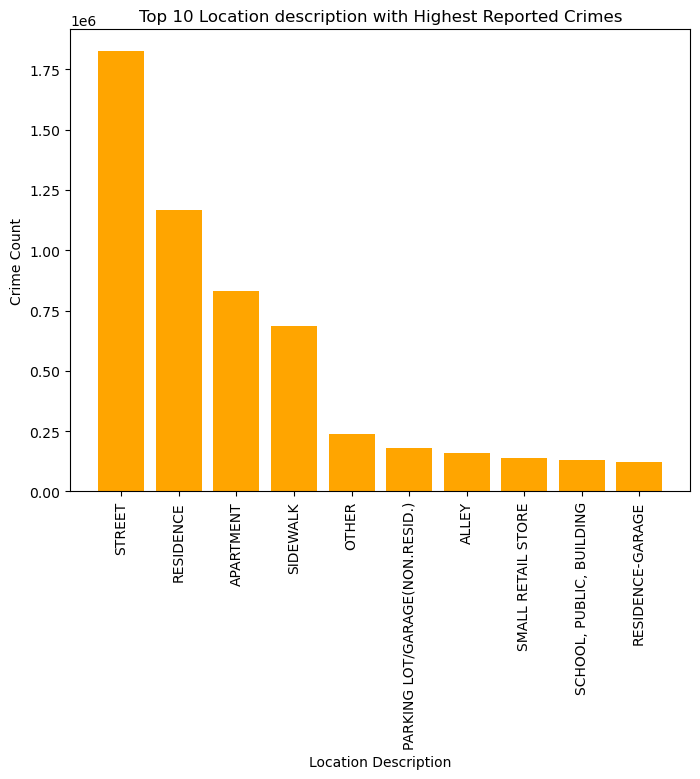

In [17]:
plt.figure(figsize=(8,6))
plt.bar(crime_location['Location Description'], crime_location['Crime_Count'], color='orange')
plt.title("Top 10 Location description with Highest Reported Crimes")
plt.xlabel("Location Description")
plt.ylabel("Crime Count")
plt.xticks(rotation=90)
plt.show()

#### Crime frequency by day of the week.

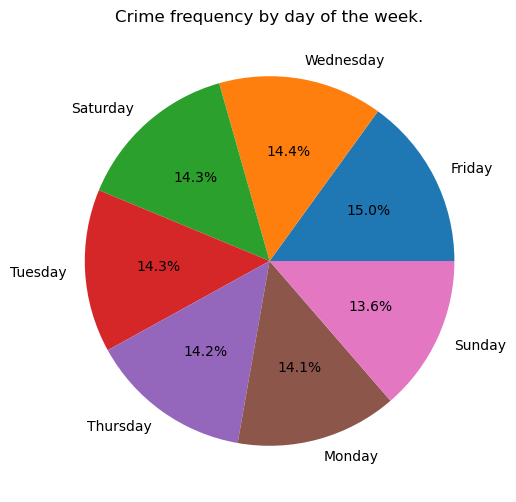

In [18]:
plt.figure(figsize=(8,6))
plt.pie(days_crime["Crime Count"], labels=days_crime["Days of the week"], autopct="%1.1f%%")
plt.title("Crime frequency by day of the week.")
plt.show()

#### Crime trends by month of the year.

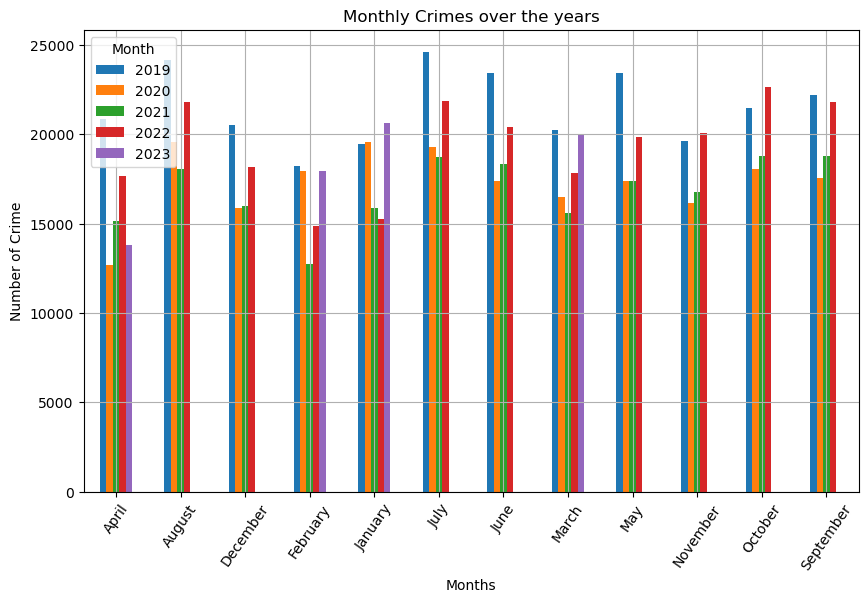

In [19]:
# To for clearity of our chat let select recent year
# Only keep recent years to avoid clutter
month_by_year_crime = month_by_year_crime[month_by_year_crime['Year']>=2019]
# creating pivot data to plot years as series and month as x-axis
pivot_data= month_by_year_crime.pivot(index='Month', columns='Year', values='Crime Count')
# plot
pivot_data.plot(kind='bar',figsize=(10,6))
plt.title("Monthly Crimes over the years")
plt.xlabel("Months")
plt.ylabel("Number of Crime")
plt.xticks(rotation=55)
plt.grid()
plt.legend(title="Month")